In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv("Forecast.csv")

In [15]:
df.head(15)

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [16]:
df.shape

(14, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [19]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['temperature', 'humidity', 'outlook', 'windy'])
df_getdummy

,play,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,outlook_overcast,outlook_rainy,outlook_sunny,windy_False,windy_True
0,yes,0,1,0,1,0,1,0,0,1,0
1,yes,1,0,0,0,1,1,0,0,0,1
2,yes,0,0,1,1,0,1,0,0,0,1
3,yes,0,1,0,0,1,1,0,0,1,0
4,yes,0,0,1,1,0,0,1,0,1,0
5,yes,1,0,0,0,1,0,1,0,1,0
6,no,1,0,0,0,1,0,1,0,0,1
7,yes,0,0,1,0,1,0,1,0,1,0
8,no,0,0,1,1,0,0,1,0,0,1
9,no,0,1,0,1,0,0,0,1,1,0


In [21]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df_getdummy.drop('play',axis=1)
y = df_getdummy['play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [22]:
# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

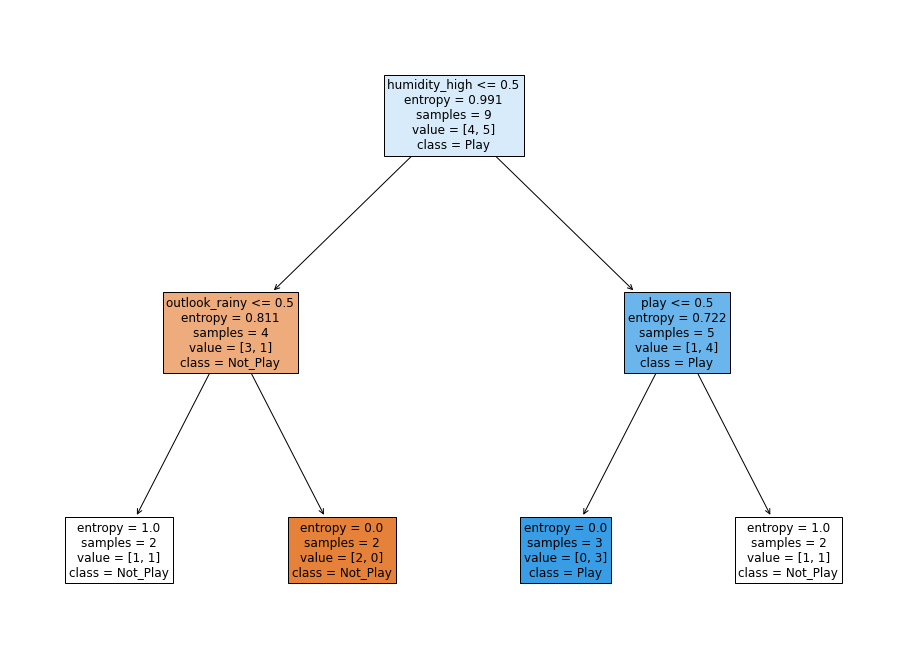

In [23]:
# visualising the decision tree diagram

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])